In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data processing

In [4]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [36]:
missing_values = data.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [37]:
data = data[~data.duplicated()]
data.shape

(536641, 8)

In [38]:
data = data[data['InvoiceNo'].str.startswith('C')!=True]
data.shape

(527390, 8)

In [39]:
data = data[data['Quantity']>=0]
data.shape

(526054, 8)

In [40]:
data = data[~data.CustomerID.isnull()]
data.shape

(392732, 8)

In [41]:
missing_values = data.isna().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [49]:
data['Revenue'] = data['Quantity']*data['UnitPrice']
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.day
data['hour'] = data['InvoiceDate'].dt.hour
data['day_of_week'] = data['InvoiceDate'].dt.dayofweek
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,year,month,day,hour,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,12,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,12,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,12,4


data analysis

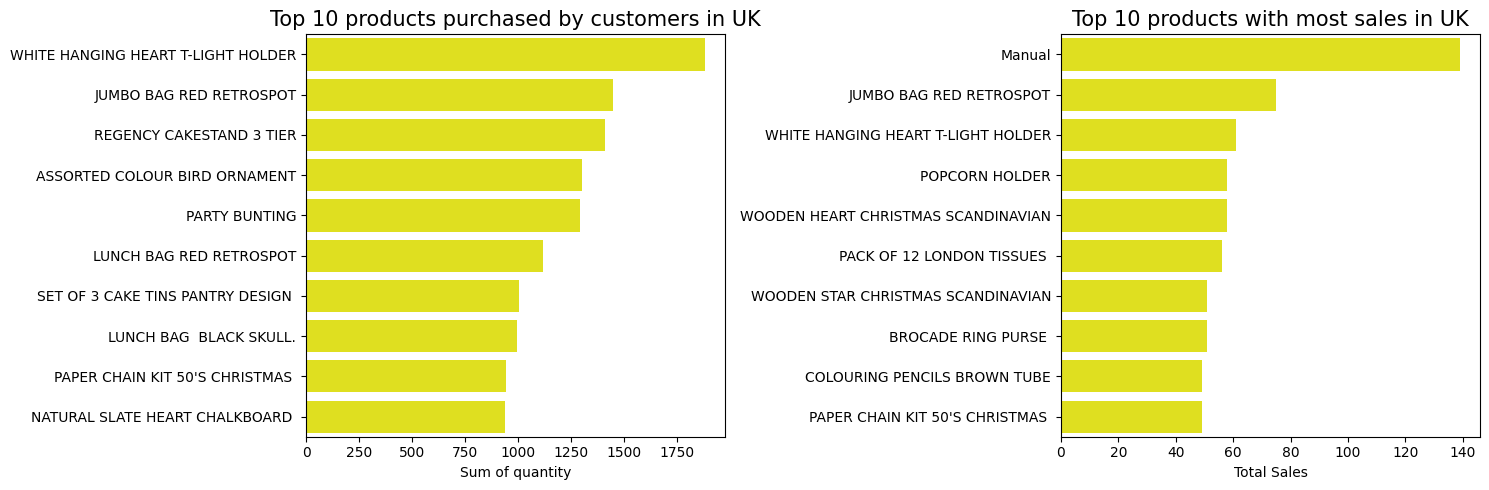

In [ ]:
column = ['InvoiceNo','Revenue']
plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = data[data['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = data[data['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

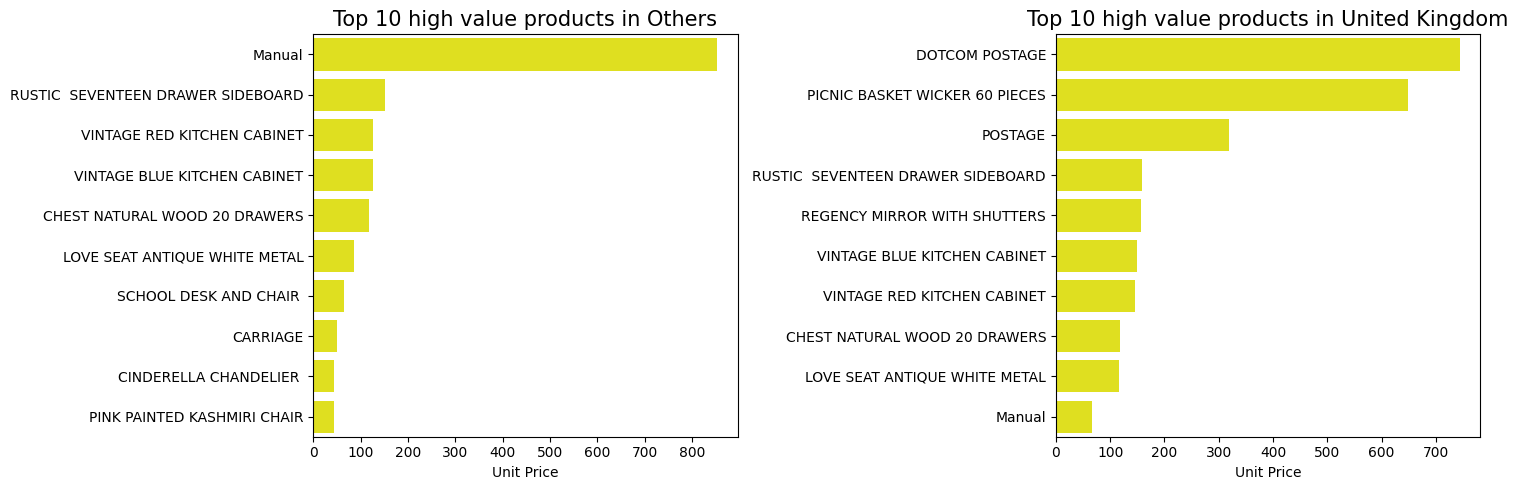

In [54]:
others = data[data['Country'] != 'United Kingdom']
column = ['Others', 'United Kingdom']

plt.figure(figsize=(15, 5))
for i, j in enumerate(column):
    if j == 'Others':
        top_products = others.groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
    else:
        top_products = data[data['Country'] == j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10)
    plt.subplot(1, 2, i + 1)
    sns.barplot(x=top_products.values, y=top_products.index, color='yellow')
    plt.ylabel('')
    plt.xlabel('Unit Price')
    plt.title(f'Top 10 high value products in {j}', size=15)
plt.tight_layout()
plt.show()

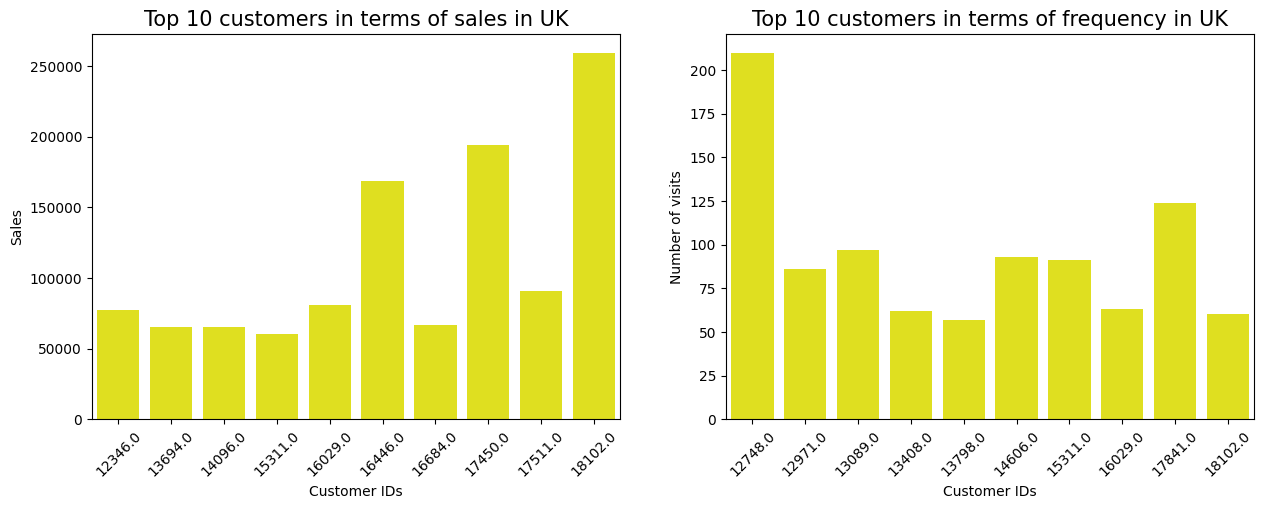

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y = data[data['Country']=='United Kingdom'].groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).values,
            x = data[data['Country']=='United Kingdom'].groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).index, 
            color='yellow')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = data[data['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).values,
            x = data[data['Country']=='United Kingdom'].groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).head(10).index, 
            color='yellow')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

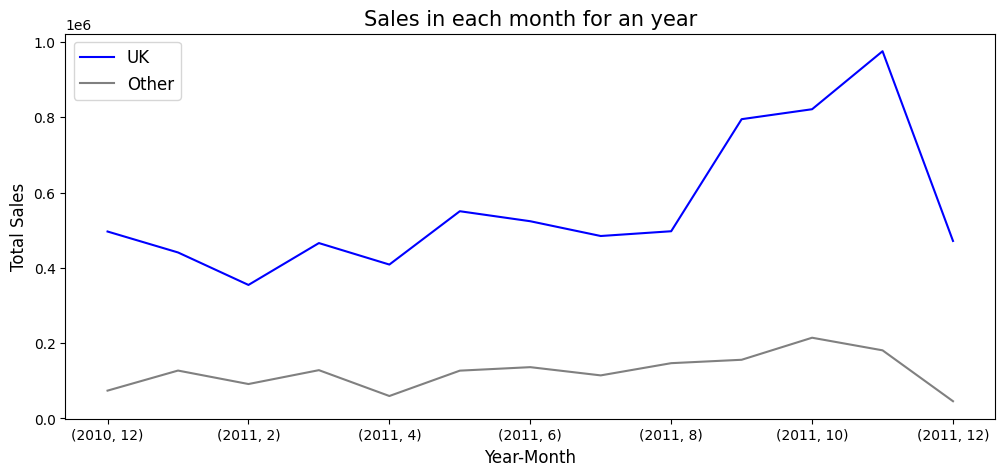

In [61]:
uk_data = data[data['Country'] == 'United Kingdom'].groupby(['year', 'month'])['Revenue'].sum()
others_data = data[data['Country'] != 'United Kingdom'].groupby(['year', 'month'])['Revenue'].sum()

plt.figure(figsize=(12, 5))
uk_data.plot(kind='line', label='UK', color='blue')
others_data.plot(kind='line', label='Other', color='grey')
plt.xlabel('Year-Month', size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

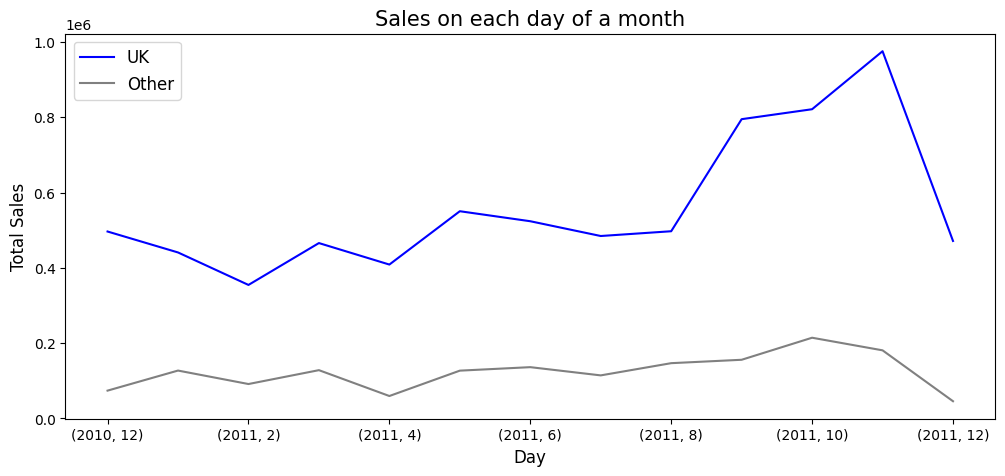

In [62]:
plt.figure(figsize=(12,5))
uk_data.plot(kind='line', label='UK', color='blue')
others_data.plot(kind='line', label='Other', color='grey')
plt.xlabel('Day',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales on each day of a month', size=15)
plt.legend(fontsize=12)
plt.show()

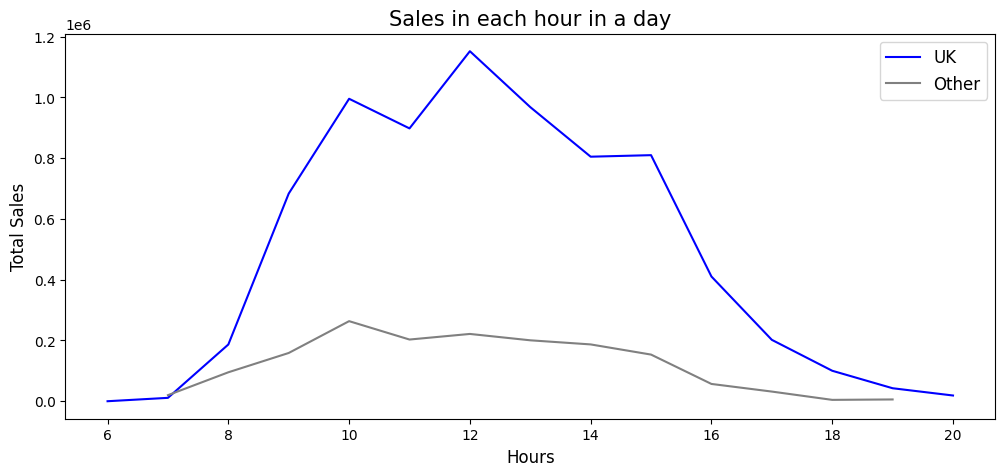

In [ ]:
if 'hour' not in data.columns:
    data['hour'] = pd.to_datetime(data['timestamp']).dt.hour
others = data[data['Country'] != 'United Kingdom'].groupby(['hour'])['Revenue'].sum()

plt.figure(figsize=(12, 5))
data[data['Country'] == 'United Kingdom'].groupby(['hour'])['Revenue'].sum().plot(kind='line', label='UK', color='blue')
others.plot(kind='line', label='Other', color='grey')
plt.xlabel('Hours', size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()


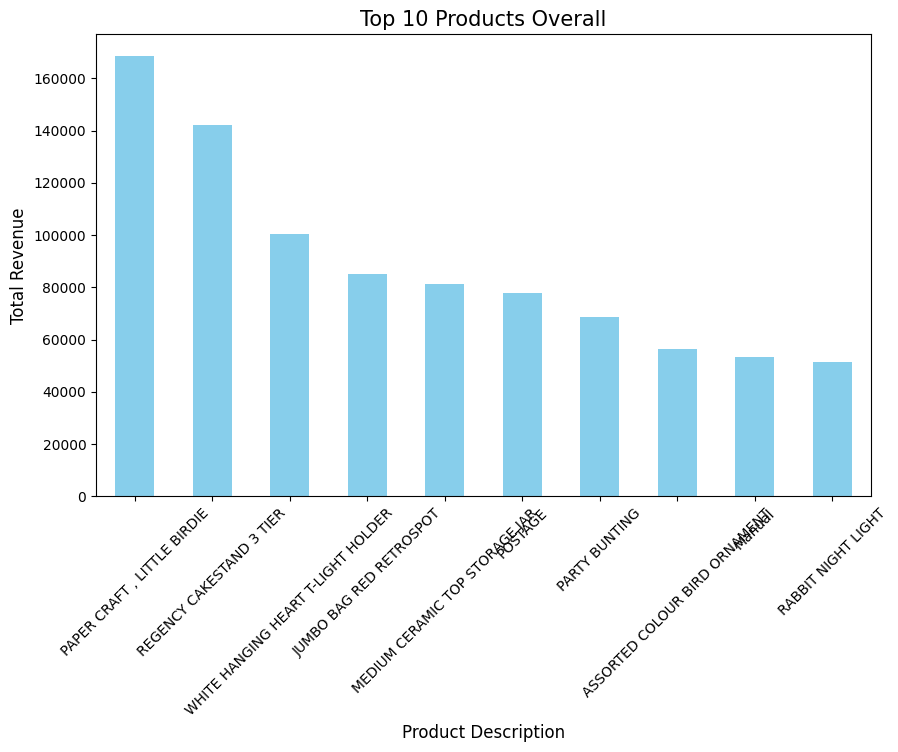

In [ ]:
top_products_overall = data.groupby('Description')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_overall.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products Overall', fontsize=15)
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


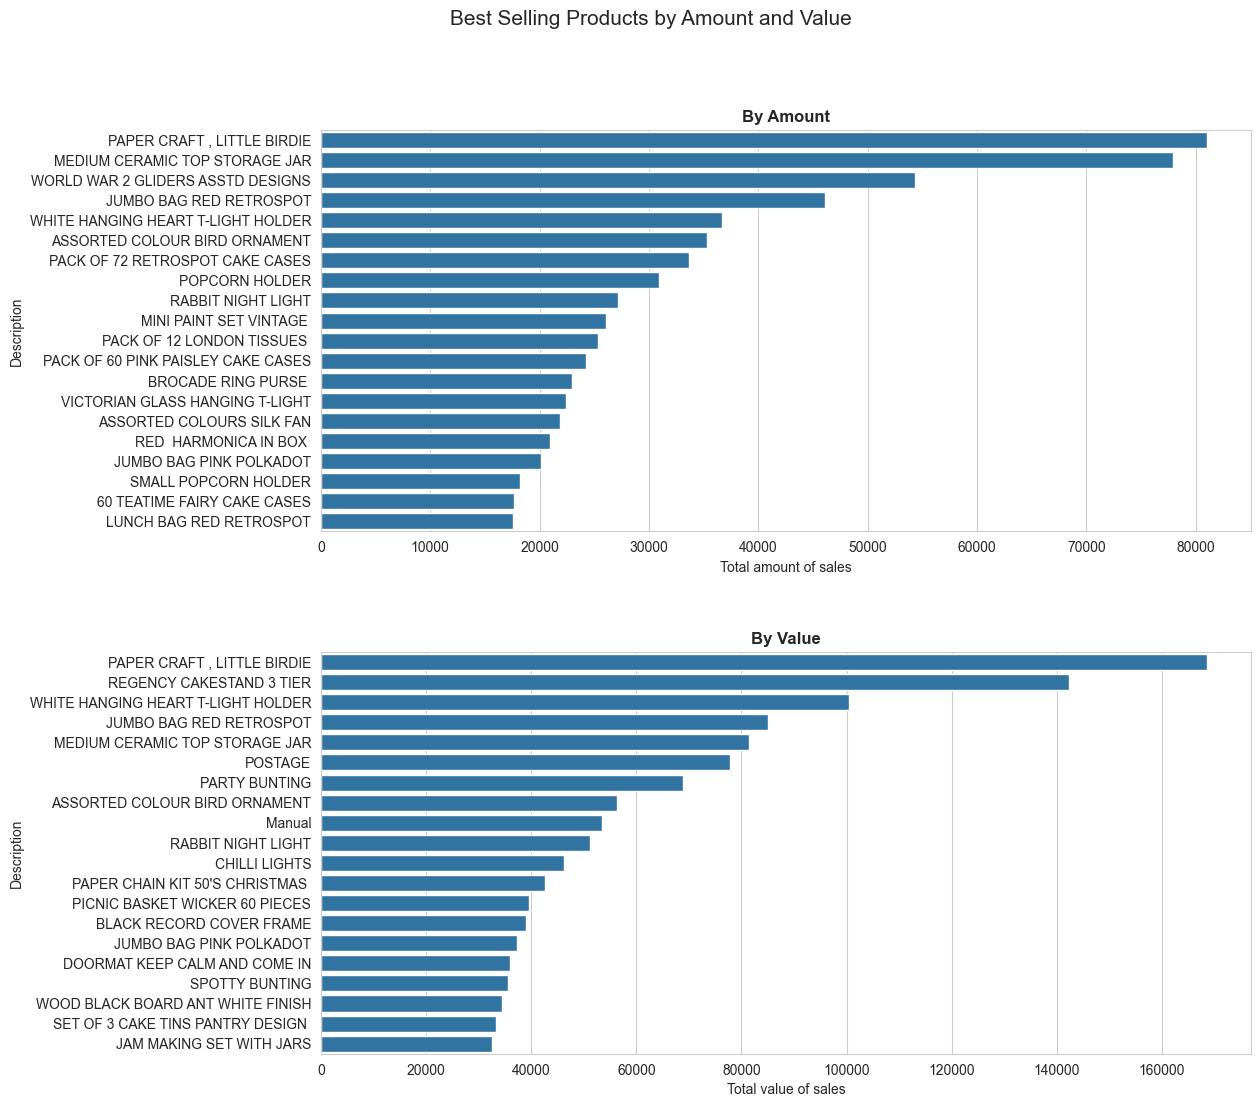

In [79]:
sns.set_style('whitegrid')
Top20Quan = data.groupby('Description')['Quantity'].agg('sum').sort_values(ascending=False)[0:20]
Top20Price = data.groupby('Description')['Revenue'].agg('sum').sort_values(ascending=False)[0:20]
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount and Value', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quan.values, y=Top20Quan.index, ax= axs[0]).set(xlabel='Total amount of sales')
axs[0].set_title('By Amount', size=12, fontweight = 'bold')
sns.barplot(x=Top20Price.values, y=Top20Price.index, ax= axs[1]).set(xlabel='Total value of sales')
axs[1].set_title('By Value', size=12, fontweight = 'bold')
plt.show()

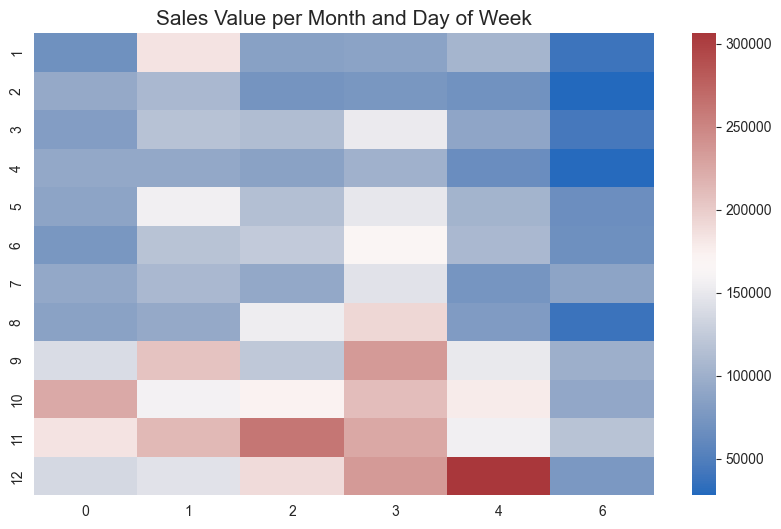

In [95]:
HM_Data = data.pivot_table(index = 'month',columns = 'day_of_week', values = 'Revenue', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()